# Customer Segmentation Using K-Means
This notebook demonstrates a simple example of using K-Means clustering to segment customers based on their average monthly spend and transaction count.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('customer_behavior.csv')
data.head()

,avg_monthly_spend,transaction_count
0,200,5
1,450,15
2,130,4
3,700,30
4,300,10


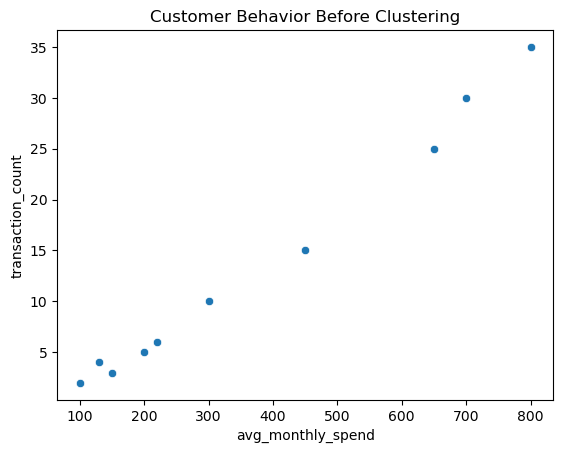

In [3]:
# Plot raw data
sns.scatterplot(data=data, x='avg_monthly_spend', y='transaction_count')
plt.title('Customer Behavior Before Clustering')
plt.show()

In [4]:
# Scale data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
#Albow plot
sse = []
k_values = range(1, 10)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # inertia_ is the SSE for the fitted clusters

/Users/ymy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

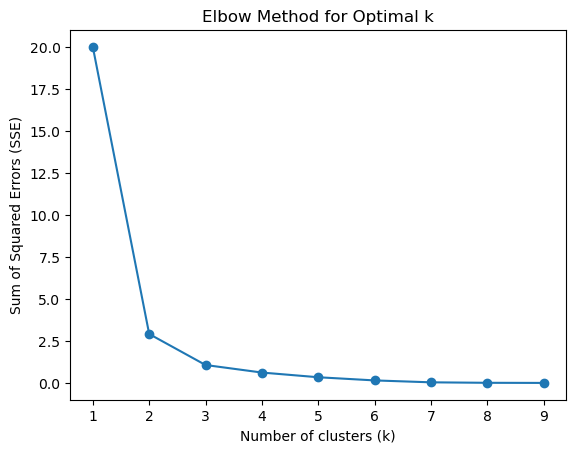

In [6]:
# Plot the elbow graph
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

/Users/ymy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


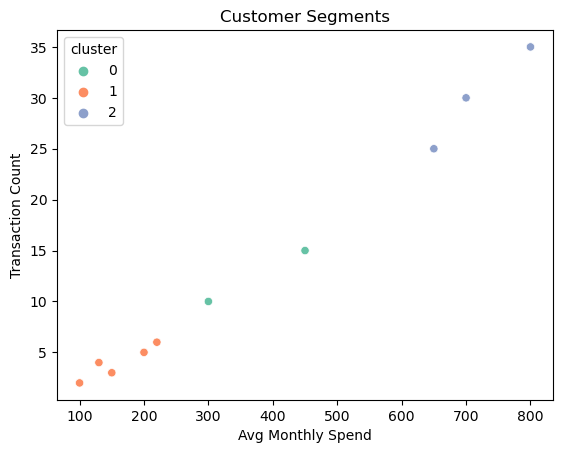

In [7]:
# Plot clustered data
sns.scatterplot(data=data, x='avg_monthly_spend', y='transaction_count', hue='cluster', palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Avg Monthly Spend')
plt.ylabel('Transaction Count')
plt.show()

### Conclusion
This simple example demonstrates how clustering can be used to group customers by behavior. Such segmentation can help businesses design targeted financial products or services.